In [1]:
import numpy as np
import numexpr as ne
import matplotlib.pyplot as plt
import scipy.io

%matplotlib inline

In [2]:
data = scipy.io.loadmat('ex5data1.mat')

X_raw = np.matrix(data['X'])
X_cv_raw = np.matrix(data['Xval'])
X_test = np.matrix(data['Xtest'])

y = np.matrix(data['y'])
y_cv = np.matrix(data['yval'])
y_test = np.matrix(data['ytest'])

assert X_raw is not None
assert X_cv_raw is not None
assert X_test is not None
assert y is not None
assert y_cv is not None
assert y_test is not None

In [3]:
def insert_bias_feature(X):
    return np.insert(X, 0, 1, axis=1)

In [4]:
def normalize(X):
    avg = np.average(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - avg) / std
    return X, avg, std

In [5]:
def get_theta(X, y, lamb=0):
        X_T = X.T
        reg_m = np.eye(np.size(X, axis=1))
        reg_m[0][0] = 0
        reg_m = ne.evaluate('lamb * reg_m')
        result = np.linalg.pinv(X_T @ X + reg_m) @ X_T @ y
        return result

In [6]:
def predict(X, theta):
    return X @ theta

In [7]:
# 1.2 Regularized linear regression cost function
def cost(X, y, theta, lamb):
    h_theta_x = predict(X, theta)
    wo_reg = np.sum(np.power(h_theta_x - y, 2), axis=0)
    theta_square = np.power(theta, 2)
    theta_square[0, 0] = 0
    theta_square_sum = np.sum(theta_square)
    m = np.size(y, axis=0)
    return 1/(2 * m) * (wo_reg + lamb * theta_square_sum)

In [8]:
# 1.3 Regularized linear regression gradient
def gradient(X, y, theta, lamb):
    h_theta_x = predict(X, theta)
    result = np.average(np.multiply((h_theta_x - y), X), axis=0)
    m = np.size(y, axis=0)
    result[:, 1:] += lamb/m * theta[1:].T
    return result

In [9]:
X = insert_bias_feature(X_raw)

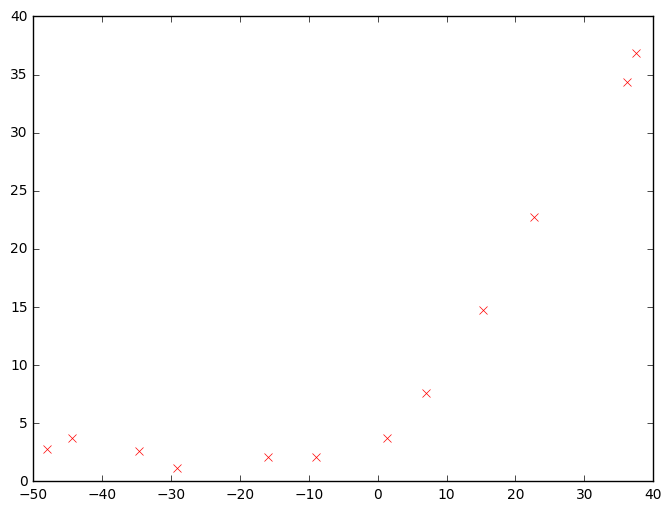

In [10]:
# 1.1 Visualizing the dataset
fig = plt.figure('Training Data', figsize=(8, 6), dpi=330)
plt.plot(X_raw, y, 'rx')
plt.show()

In [11]:
# 1.2 Test
cost_train = cost(X, y, np.matrix('1; 1'), 1)
assert np.round(cost_train, 3) == 303.993

In [12]:
# 1.3 Test
grad = gradient(np.insert(X_raw, 0, 1, axis=1), y, np.matrix('1; 1'), 1)
assert np.round(grad[0, 0], 2) == -15.30
assert np.round(grad[0, 1], 3) == 598.251

In [13]:
plot_X = np.matrix('1 -50; 1 40')
theta = get_theta(X, y)
plot_y = predict(plot_X, theta)
plot_x = [-50, 40]
plot_y = [plot_y[0, 0], plot_y[1, 0]]

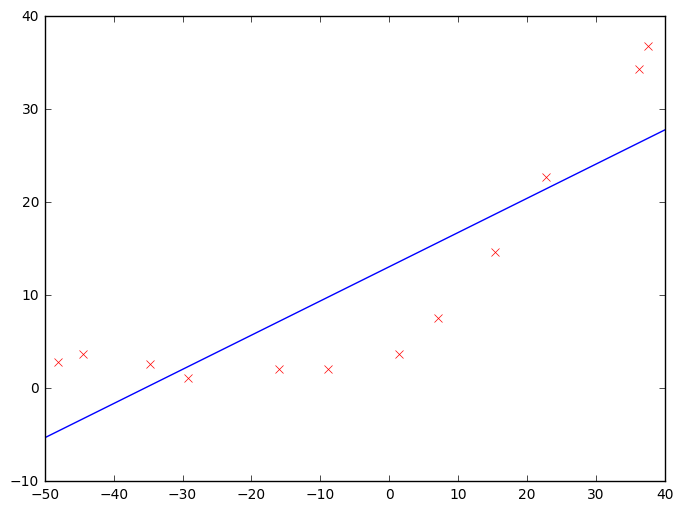

In [14]:
# 1.4 Fitting linear regression
fig = plt.figure('Without Regularization', figsize=(8, 6), dpi=330)
plt.plot(X_raw, y, 'rx')
plt.plot(plot_x, plot_y, 'b')
plt.show()

In [15]:
def insert_poly_features(X, p, has_bias_feature=True):
    if p >= 2:
        result = X
        original_feature = np.matrix(X[:, 1 if has_bias_feature else 0])
        for i in range(p):
            if i >= 1:
                poly_feature_cur = np.power(original_feature, i + 1)
                result = np.append(result, poly_feature_cur, axis=1)
        return result
    else:
        return X

In [16]:
# 2.1 Learning Curves
def plot_learning_curve(d=1, reg_lamb=0):
    m_count = range(np.size(y, axis=0) + 1)[1:]
    cost_train = []
    cost_cv = []

    for m in m_count:
        X_train_tmp = X_raw[:m]
        X_train_tmp = insert_poly_features(X_train_tmp, d, has_bias_feature=False)
        if m > 1:
            X_train_tmp, avg, std = normalize(X_train_tmp)
        X_train_tmp = insert_bias_feature(X_train_tmp)
        y_train_tmp = y[:m]
        theta = get_theta(X_train_tmp, y_train_tmp, lamb=reg_lamb)

        X_cv_tmp = X_cv_raw
        X_cv_tmp = insert_poly_features(X_cv_tmp, d, has_bias_feature=False)
        if m > 1:
            X_cv_tmp = (X_cv_tmp - avg) / std
        X_cv_tmp = insert_bias_feature(X_cv_tmp)
        cost_train.append(np.sum(cost(X_train_tmp, y_train_tmp, theta=theta, lamb=0)))
        cost_cv.append(np.sum(cost(X_cv_tmp, y_cv, theta=theta, lamb=0)))
    
    fig = plt.figure('Learning Curve (lambda = 0)', figsize=(8, 6), dpi=330)
    plt.plot(m_count, cost_train, 'b')
    plt.plot(m_count, cost_cv, 'g')
    axis = plt.gca()
    axis.set_ylim([0, 100])
    plt.show()

In [17]:
d = 10
reg_lamb = 0
X_norm, avg, std = normalize(insert_poly_features(X_raw, p=d, has_bias_feature=False))
X_norm = insert_bias_feature(X_norm)

theta = get_theta(X_norm, y, lamb=reg_lamb)
x_plot = np.matrix(np.arange(start=-60, stop=60, step=0.1)).T
x_plot = insert_bias_feature(x_plot)
x_plot = insert_poly_features(x_plot, p=d, has_bias_feature=True)
x_plot[:, 1:] = (x_plot[:, 1:] - avg) / std
h_theta_x = predict(x_plot, theta)

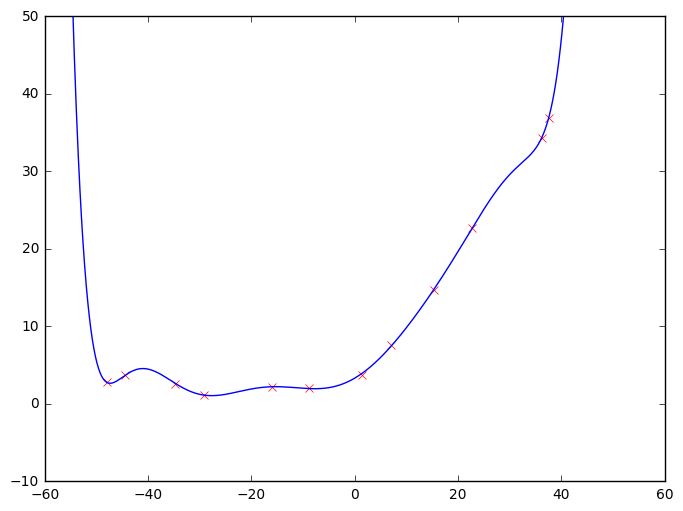

In [18]:
# 3.1 Learning Polynomial Regression
x_plot = np.arange(start=-60, stop=60, step=0.1)
fig = plt.figure('Polynomial Features', figsize=(8, 6), dpi=330)
plt.plot(X_raw, y, 'rx')
plt.plot(x_plot, h_theta_x, 'b')
axis = plt.gca()
axis.set_ylim([-10, 50])
plt.show()

In [19]:
d = 8
reg_lamb = 1
X_norm, avg, std = normalize(insert_poly_features(X_raw, p=d, has_bias_feature=False))
X_norm = insert_bias_feature(X_norm)

theta = get_theta(X_norm, y, lamb=reg_lamb)
x_plot = np.matrix(np.arange(start=-60, stop=60, step=0.1)).T
x_plot = insert_bias_feature(x_plot)
x_plot = insert_poly_features(x_plot, p=d, has_bias_feature=True)
x_plot[:, 1:] = (x_plot[:, 1:] - avg) / std
h_theta_x = predict(x_plot, theta)

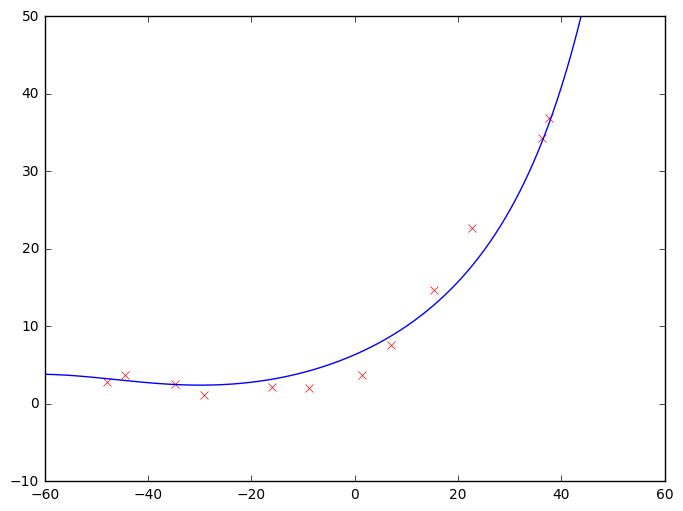

In [20]:
# 3.1 Learning Polynomial Regression
x_plot = np.arange(start=-60, stop=60, step=0.1)
fig = plt.figure('Polynomial Features', figsize=(8, 6), dpi=330)
plt.plot(X_raw, y, 'rx')
plt.plot(x_plot, h_theta_x, 'b')
axis = plt.gca()
axis.set_ylim([-10, 50])
plt.show()

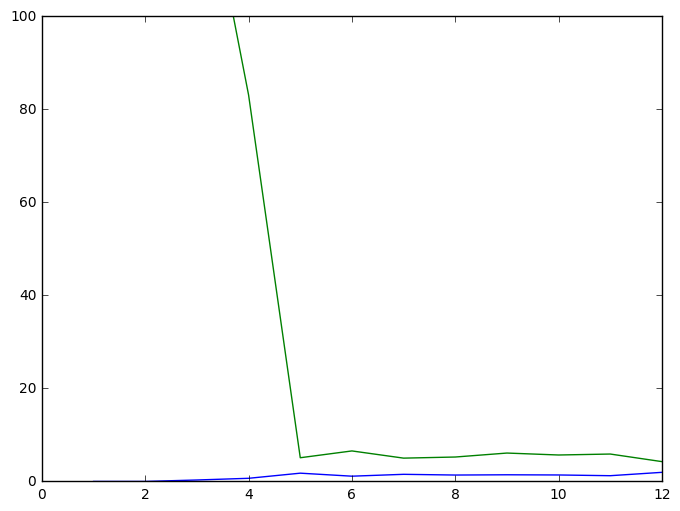

In [21]:
plot_learning_curve(d=8, reg_lamb=reg_lamb)